Importing & Installing Libraries

In [2]:
!pip3 install nltk
import nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
%matplotlib inline
import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import tqdm as tqdm
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
import nltk
nltk.download('vader_lexicon')

from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Reading the file

In [6]:
data = pd.read_csv('/content/SA - Reviews.csv',nrows=20000,encoding='utf8')

In [8]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
data=data.drop(['UserId','Id','ProfileName','Time'],axis=1)

Overall Score

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


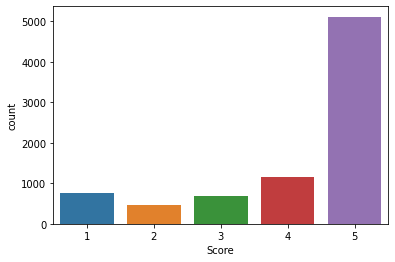

In [8]:
sns.countplot(data['Score'])

Data Preprocessing

In [9]:
def cleaning( review, remove_stopwords=True):
   
    

    review_text = re.sub("[^a-zA-Z]"," ", review)
   
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer 
    for word in words:
        b.append(stemmer.stem(word))

    
    return(b)

Test

In [10]:
Test = "###$$$$$$$999$$$$*&^^saello the if area"
cleaning(Test)

['saello', 'area']

Cleaning the Data

In [11]:
clean_Text = []
for review in data['Text']:
    clean_Text.append( " ".join(cleaning(review)))
    
clean_summary = []
for review in data['Summary']:
    clean_summary.append( " ".join(cleaning(review)))

Top Word Count In Text(Review)

In [12]:
Top_Words_Review =pd.Series(' '.join(clean_Text).lower().split()).value_counts()[:10]
print ("Top Count Words Used In Review", Top_Words_Review)

Top Count Words Used In Review br         9085
like       3965
tast       3723
flavor     3217
good       2964
product    2926
use        2589
one        2519
love       2460
great      2452
dtype: int64


Top Word Count In Summary

In [13]:
Top_Words_Summary = pd.Series(' '.join(clean_summary).lower().split()).value_counts()[:10]
print ("Top Count Words Used In Summary",Top_Words_Summary)

Top Count Words Used In Summary great      1136
good        808
best        527
love        483
tast        463
product     311
delici      264
flavor      244
tea         243
coffe       243
dtype: int64


Term Frequency Inverse Document Frequency of reviews

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(clean_Text)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print("use: " + str(tfidf["br"]))
print("like: " + str(tfidf["like"]))
print("tast: " + str(tfidf["tast"]))
print("flavor: " + str(tfidf["flavor"]))
print("coffe: " + str(tfidf["coffe"]))

use: 2.3809350303871852
like: 2.1090475929885644
tast: 2.162271860581655
flavor: 2.3645491215963665
coffe: 3.2362010604235656


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Sentiment Analysis

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Senti = SentimentIntensityAnalyzer()
sample_review = clean_Text[:5]
for sentence in sample_review:
    sentence
    ss = Senti.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentence) 

compound: 0.9081, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better
compound: -0.1027, 
neg: 0.129, 
neu: 0.762, 
pos: 0.11, 
product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo
compound: 0.6249, 
neg: 0.141, 
neu: 0.636, 
pos: 0.223, 
confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor high recommend yummi treat familiar stori c lewi lion witch wardrob treat seduc edmund sell brother sister witch
compound: 0.4404, 
neg: 0.0, 
neu: 0.854, 
pos: 0.146, 
look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin
compound: 0.9186, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
great taffi great price wide assort yummi taffi deliveri quick taffi lover deal


K-Means

In [16]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 dog
 food
 treat
 love
 cat

Cluster 1:
 tea
 green
 br
 ice
 tast

Cluster 2:
 chip
 bag
 flavor
 potato
 salt

Cluster 3:
 drink
 juic
 orang
 soda
 tast

Cluster 4:
 chocol
 hot
 cocoa
 cup
 dark

Cluster 5:
 br
 like
 product
 flavor
 tast

Cluster 6:
 love
 order
 great
 snack
 flavor

Cluster 7:
 product
 pancak
 mix
 great
 gluten

Cluster 8:
 good
 like
 tast
 flavor
 one

Cluster 9:
 coffe
 cup
 tast
 use
 br



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LSTM

In [18]:
Text = data.Text
Ratings = data.Score
vectorizer = TfidfVectorizer(max_df=.8)
vectorizer.fit(Text)
def categorize(ratings):
    cats = []
    for rating in ratings:
        v = [0,0,0,0,0]
        v[rating-1] = 1
        cats.append(v)
    return np.array(cats)

X = vectorizer.transform(Text).toarray()
y = categorize(Ratings.values)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Epoch 1/10
205/205 [==============================] - 7s 31ms/step - loss: 1.0662 - accuracy: 0.6283
Epoch 2/10
205/205 [==============================] - 4s 18ms/step - loss: 0.7712 - accuracy: 0.7171
Epoch 3/10
205/205 [==============================] - 4s 18ms/step - loss: 0.6061 - accuracy: 0.7905
Epoch 4/10
205/205 [==============================] - 4s 18ms/step - loss: 0.4850 - accuracy: 0.8404
Epoch 5/10
205/205 [==============================] - 4s 18ms/step - loss: 0.3894 - accuracy: 0.8783
Epoch 6/10
205/205 [==============================] - 4s 18ms/step - loss: 0.3150 - accuracy: 0.9000
Epoch 7/10
205/205 [==============================] - 4s 18ms/step - loss: 0.2581 - accuracy: 0.9195
Epoch 8/10
205/205 [==============================] - 4s 18ms/step - loss: 0.2120 - accuracy: 0.9366
Epoch 9/10
205/205 [==============================] - 4s 18ms/step - loss: 0.1764 - accuracy: 0.9479
Epoch 10/10
52/52 [==============================] - 1s 6ms/step - loss: 1.2412 - accuracy:

0.658730149269104